In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('ml_dataSet.csv')



In [75]:
data.drop("Name",axis =1,inplace = True)
data.drop(["NA_Sales","PAL_Sales","NA_Sales","JP_Sales" ,"Other_Sales","Total_Sales"],axis =1,inplace= True)
data.head()


,fill,Platform,meta_score,meta_UserReview,Year,Genre,Publisher,Developer,vg_critic_score,Global_Sales
0,0,N64,99,9.1,1998,Adventure,Nintendo,Nintendo EAD,9.9,7.60
1,1,PS,98,7.4,2000,Sports,Activision,Neversoft Entertainment,9.3,4.68
2,2,PS3,98,7.7,2008,Action,Rockstar Games,Rockstar North,10.0,10.57
3,3,DC,98,8.4,1999,Fighting,Namco,Namco,9.6,0.34
4,4,X360,98,7.9,2008,Action,Rockstar Games,Rockstar North,10.0,11.09


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score


# one -hot encoding

def onehot_encode(data, columns):
    for column in columns:
        dummies = pd.get_dummies(data[column])
        data = pd.concat([data, dummies], axis=1)
        data.drop(column, axis=1, inplace=True)
    return data

onehot_columns = ['Platform', "Genre", 'Publisher']
data = onehot_encode(data, onehot_columns)

data.head()

,fill,meta_score,meta_UserReview,Year,Developer,vg_critic_score,Global_Sales,3DS,DC,DS,...,cleaversoft,iWin,iam8bit,id Software,inXile Entertainment,indiePub,miHoYo,nWay,osao,thechineseroom
0,0,99,9.1,1998,Nintendo EAD,9.9,7.60,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,98,7.4,2000,Neversoft Entertainment,9.3,4.68,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,98,7.7,2008,Rockstar North,10.0,10.57,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,98,8.4,1999,Namco,9.6,0.34,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,98,7.9,2008,Rockstar North,10.0,11.09,0,0,0,...,0,0,0,0,0,0,0,0,0,0


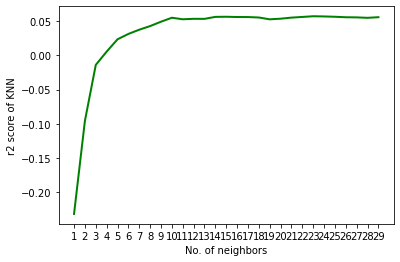

In [81]:
x = data.copy(deep=True)
y = pd.DataFrame(x["Global_Sales"])
x.drop("Global_Sales",axis=1 ,inplace=True)
x.drop("vg_critic_score",axis = 1, inplace =True)
x.drop("Developer",axis=1,inplace=True)
x.head()



knnRange = range(1,30,1)
scores_list=[]
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size = 0.3)
for i in knnRange:
    regressor_knn = KNeighborsRegressor(n_neighbors=i)
    regressor_knn.fit(X_train,y_train)
    y_pred = regressor_knn.predict(X_test)
    scores_list.append(r2_score(y_test,y_pred))
plt.plot(knnRange,scores_list,linewidth=2,color='green')
plt.xticks(knnRange)
plt.xlabel('No. of neighbors')
plt.ylabel('r2 score of KNN')
plt.show() 


In [79]:
regressor_knn = KNeighborsRegressor(n_neighbors=20)
regressor_knn.fit(X_train,y_train)
y_pred = regressor_knn.predict(X_test)
r2_knn = r2_score(y_test,y_pred)
print(r2_knn)

0.03339892099359454
